# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data
training_file = "data/train.p"
validation_file= "data/valid.p"
testing_file = "data/test.p"
with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [2]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results
import numpy as np
# TODO: Number of training examples
n_train = X_train.shape[0]

# TODO: Number of testing examples.
n_test = X_test.shape[0]

# TODO: What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = np.unique(y_train).shape[0]

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

In [3]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline

In [4]:
# Load the labels from csv file into a dict
import csv
signnames='signnames.csv'
csvlabels=[]
with open(signnames,'r') as csvfile:
    _reader=csv.DictReader(csvfile, delimiter=",")
    for row in _reader:
        csvlabels.append(row['SignName'])

In [5]:
# Distribution of labels in train set:

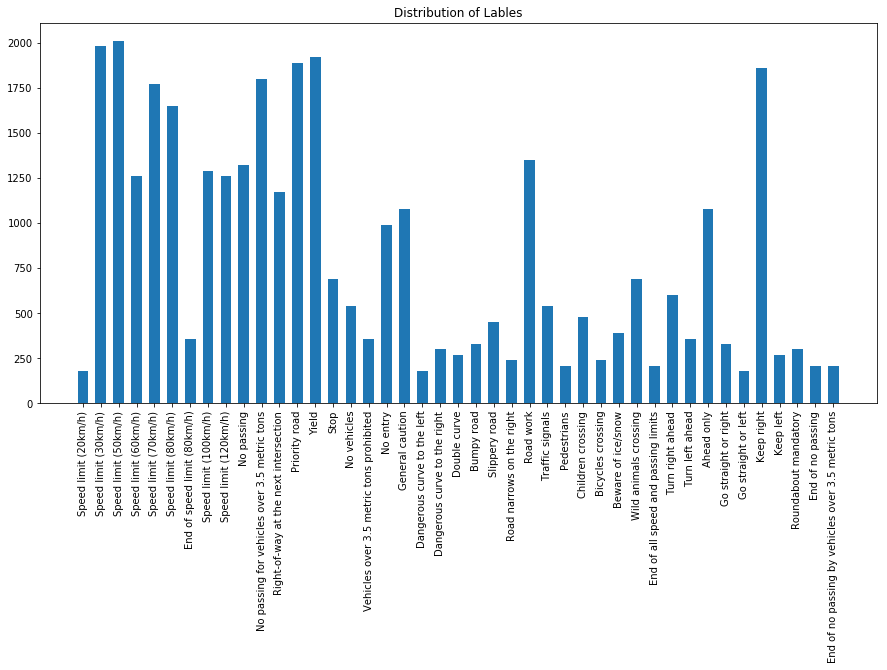

In [6]:
hist,edges=np.histogram(y_train, bins=n_classes)
fig=plt.figure(figsize=(15,7))
plt.bar(np.arange(n_classes),hist,width=0.6)
plt.xticks(np.arange(n_classes),csvlabels,rotation='vertical')
plt.title("Distribution of Lables")

Example Image: y value: 0 (Speed limit (20km/h))


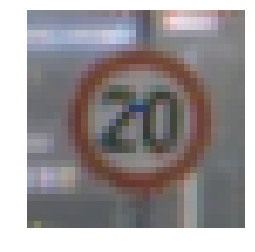

In [7]:
# Visualize some images
image_disp = X_train[10000]
plt.axis('off')
plt.imshow(image_disp)
print('Example Image: y value: {} ({})'.format(y_train[10000],csvlabels[y_train[10000]] ))

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [8]:
# we will now sample the dataset so that it is balanced and also do some 
# simple transformations in cv2 randomly to generate more training examples
import cv2
def transform_image(img, ang_range, shear_range, trans_range):
    # taken here: https://github.com/vxy10/ImageAugmentation
    '''
    This function transforms images to generate new images.
    The function takes in following arguments,
    1- Image
    2- ang_range: Range of angles for rotation
    3- shear_range: Range of values to apply affine transform to
    4- trans_range: Range of values to apply translations over. 
    
    A Random uniform distribution is used to generate different parameters for transformation
    
    '''
    # Rotation

    ang_rot = np.random.uniform(ang_range)-ang_range/2
    rows,cols,ch = img.shape    
    Rot_M = cv2.getRotationMatrix2D((cols/2,rows/2),ang_rot,1)

    # Translation
    tr_x = trans_range*np.random.uniform()-trans_range/2
    tr_y = trans_range*np.random.uniform()-trans_range/2
    Trans_M = np.float32([[1,0,tr_x],[0,1,tr_y]])

    # Shear
    pts1 = np.float32([[5,5],[20,5],[5,20]])

    pt1 = 5+shear_range*np.random.uniform()-shear_range/2
    pt2 = 20+shear_range*np.random.uniform()-shear_range/2
    
    # Brightness 
    

    pts2 = np.float32([[pt1,5],[pt2,pt1],[5,pt2]])

    shear_M = cv2.getAffineTransform(pts1,pts2)
        
    img = cv2.warpAffine(img,Rot_M,(cols,rows))
    img = cv2.warpAffine(img,Trans_M,(cols,rows))
    img = cv2.warpAffine(img,shear_M,(cols,rows))
    
    return img

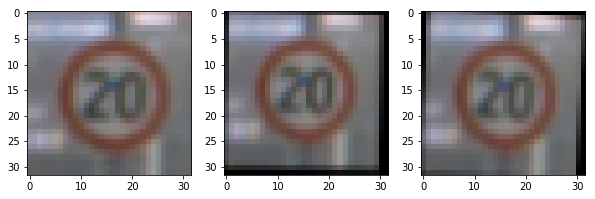

In [9]:
# we will perform some random transformations
fig=plt.figure(figsize=(10,4))
plt.subplot(131)
plt.imshow(transform_image(X_train[10000],2,2,1))
plt.subplot(132)
plt.imshow(transform_image(X_train[10000],2,2,1))
plt.subplot(133)
plt.imshow(transform_image(X_train[10000],2,2,1))

In [10]:
all_classes = list(set(y_train.tolist()))
X_train_balance = []
y_train_balance = []

sample_no = 500

In [11]:
import random

for cc in all_classes:
    indices = np.where(y_train==cc)[0]
    
    for _ in range(sample_no):
        img_sample = random.choice(indices)
        new_img = transform_image(X_train[img_sample],10,10,5)
        X_train_balance.append(new_img)
        y_train_balance.append(cc)

y_train_balance = np.array(y_train_balance)
X_train_balance = np.array(X_train_balance)

In [12]:
### Preprocess the data here. Preprocessing steps could include normalization, converting to grayscale, etc.
### Feel free to use as many code cells as needed.
from sklearn.utils import shuffle

X_train, y_train = shuffle(X_train, y_train)

In [13]:
X_train.shape

(34799, 32, 32, 3)

In [14]:
X_train_balance.shape

(21500, 32, 32, 3)

In [15]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler().fit(X_train.reshape(y_train.shape[0],-1).astype(np.float64))
X_train = scaler.transform(X_train.reshape(y_train.shape[0],-1).astype(np.float64)).reshape(-1,32,32,3)
X_valid = scaler.transform(X_valid.reshape(y_valid.shape[0],-1).astype(np.float64)).reshape(-1,32,32,3)
X_train_balance = scaler.transform(X_train_balance.reshape(y_train_balance.shape[0],-1).astype(np.float64)).reshape(-1,32,32,3)
X_test  = scaler.transform(X_test.reshape(y_test.shape[0],-1).astype(np.float64)).reshape(-1,32,32,3)
print("X_train shape: {}\nX_valid shape: {} \nX_test shape: {}".format(X_train.shape,X_valid.shape,X_test.shape))


X_train shape: (34799, 32, 32, 3)
X_valid shape: (4410, 32, 32, 3) 
X_test shape: (12630, 32, 32, 3)


In [16]:
# Concatenate X_train and X_train_balance
X_train=np.concatenate((X_train,X_train_balance),axis=0)
y_train=np.concatenate((y_train,y_train_balance))

### Model Architecture

In [17]:
### Define your architecture here.
### Feel free to use as many code cells as needed.
import tensorflow as tf
from tensorflow.contrib.layers import flatten

EPOCHS = 40
BATCH_SIZE = 128

In [18]:
"""
from the Srivastava/Hinton dropout paper:
"The additional gain in performance obtained by adding dropout in the convolutional layers (3.02% to 2.55%) is worth noting. One may have presumed that since the convolutional layers don’t have a lot of parameters, overfitting is not a problem and therefore dropout would not have much effect. However, dropout in the lower layers still helps because it provides noisy inputs for the higher fully connected layers which prevents them from overfitting."
They use 0.7 prob for conv drop out and 0.5 for fully connected.
"""

def LeNet(x):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    
    
    # Layer 1: Convolutional. Input = 32x32x3. Output = 28x28x6.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 3, 6), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(6))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    #  Activation.
    conv1 = tf.nn.relu(conv1)
    
    # add dropout regularization
    #conv1 = tf.nn.dropout(conv1, 0.7)


    # Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    #  Layer 2: Convolutional. Output = 10x10x16.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    # Activation.
    conv2 = tf.nn.relu(conv2)

    # Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    # adding dropout regularization
    #conv2 = tf.nn.dropout(conv2, 0.7)

    # Flatten. Input = 5x5x16. Output = 400.
    fc0   = flatten(conv2)
    
    # Layer 3: Fully Connected. Input = 400. Output = 120.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(400, 120), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(120))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    # Activation.
    fc1    = tf.nn.relu(fc1)
    
    # adding dropout regularization
    fc1 = tf.nn.dropout(fc1, 0.75)

    # Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(84))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    
    # Activation.
    fc2    = tf.nn.relu(fc2)
    # adding dropout regularization
    fc2 = tf.nn.dropout(fc2, 0.75)

    # Layer 5: Fully Connected. Input = 84. Output = 43.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(84, 43), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(43))
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    
    return logits

In [19]:
x = tf.placeholder(tf.float32, (None, 32, 32, 3))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, 43)

In [20]:
logits = LeNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)

step = tf.Variable(0, trainable=False)
# 0.005 --> 0.001 with 0.94

start = 0.005
end = 0.001
decay = (end/start)**(1/EPOCHS)

rate = tf.train.exponential_decay(start, 0, 1, decay) # goes from 0.005 -> 0.00036
training_operation = tf.train.AdamOptimizer(rate).minimize(cross_entropy, global_step=step)

#rate = 0.005
#optimizer = tf.train.AdamOptimizer(learning_rate = rate)
#training_operation = optimizer.minimize(loss_operation)
#training_operation = tf.train.AdamOptimizer(learning_rate = rate).minimize(loss_operation)


In [21]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [22]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})
        
        training_accuracy = evaluate(X_train, y_train)
        validation_accuracy = evaluate(X_valid, y_valid)
        print("EPOCH {} ...".format(i+1))
        print("Training Accuracy = {:.3f}".format(training_accuracy))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    saver.save(sess, './lenet_traffic_2dropout')
    print("Model saved")

Training...

EPOCH 1 ...
Training Accuracy = 0.653
Validation Accuracy = 0.764

EPOCH 2 ...
Training Accuracy = 0.726
Validation Accuracy = 0.810

EPOCH 3 ...
Training Accuracy = 0.746
Validation Accuracy = 0.836

EPOCH 4 ...
Training Accuracy = 0.760
Validation Accuracy = 0.844

EPOCH 5 ...
Training Accuracy = 0.746
Validation Accuracy = 0.814

EPOCH 6 ...
Training Accuracy = 0.779
Validation Accuracy = 0.847

EPOCH 7 ...
Training Accuracy = 0.781
Validation Accuracy = 0.854

EPOCH 8 ...
Training Accuracy = 0.800
Validation Accuracy = 0.855

EPOCH 9 ...
Training Accuracy = 0.795
Validation Accuracy = 0.839

EPOCH 10 ...
Training Accuracy = 0.800
Validation Accuracy = 0.866

EPOCH 11 ...
Training Accuracy = 0.798
Validation Accuracy = 0.846

EPOCH 12 ...
Training Accuracy = 0.817
Validation Accuracy = 0.870

EPOCH 13 ...
Training Accuracy = 0.810
Validation Accuracy = 0.869

EPOCH 14 ...
Training Accuracy = 0.813
Validation Accuracy = 0.862

EPOCH 15 ...
Training Accuracy = 0.796
Valid

In [23]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

Test Accuracy = 0.864


## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

In [24]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
# Images downloaded from: http://benchmark.ini.rub.de/Dataset/GTSRB_Final_Test_Images.zip
# csv_label_file='test_data/GTSRB/GT-final_test.csv'
import cv2

In [25]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
# Load images from .png files to `X_custom` NumPy array
import skimage.io

X_custom = []
for i in range(10):
    image = skimage.io.imread('images/' + "example_{0:0>5}".format(i+1) + '.png')
    X_custom.append(image[:,:,:3])

y_custom = np.array([
    21, # "example_00001"
    39, # "example_00002"
    17, # "example_00003"
    17, # "example_00004"
    17, # "example_00005"
    39, # "example_00006"
    39, # "example_00007"
    40, # "example_00008"
    40, # "example_00009"
    34, # "example_00010"
])

### Predict the Sign Type for Each Image

In [26]:
X_custom_transform = scaler.transform(np.array(X_custom).reshape(y_custom.shape[0],-1).astype(np.float64)).reshape(-1,32,32,3)

In [27]:
def predict(X_data):
    x_size = len(X_data)
    y_pred=tf.argmax(logits,1)

    p_logits = sess.run(logits,feed_dict={x:X_data})
    predictions = sess.run(y_pred,feed_dict={x:X_data})

    return predictions, p_logits

In [28]:
predictions=None
p_logits=None
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    predictions, p_logits=predict(X_custom)

In [29]:
def get_top_k(x, k=5):
    # returns the index of the top 5...
    indices = x.argsort()[-k:][::-1]
    # also get the log odds for the 5
    log_odds = x[indices]
    
    # get label names
    labels = [csvlabels[x] for x in indices]
    return indices, log_odds, labels
    
print(get_top_k(p_logits[0]))
print(csvlabels[y_custom[0]])

(array([ 0, 29, 23, 22, 24], dtype=int64), array([ 445.04180908,  389.33810425,  378.56210327,  324.82351685,
        310.91009521], dtype=float32), ['Speed limit (20km/h)', 'Bicycles crossing', 'Slippery road', 'Bumpy road', 'Road narrows on the right'])
Double curve


### Analyze Performance

In [30]:
def check_correct(x):
    indices, log_odds, labels = get_top_k(p_logits[x])
    #print(labels[0])
    #print(csvlabels[y_custom[x]])
    return labels[0] == csvlabels[y_custom[x]]
print("Accuracy: {}".format(np.mean([check_correct(x)*1 for x in range(len(y_custom))])*100))

Accuracy: 90.0


### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tk.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

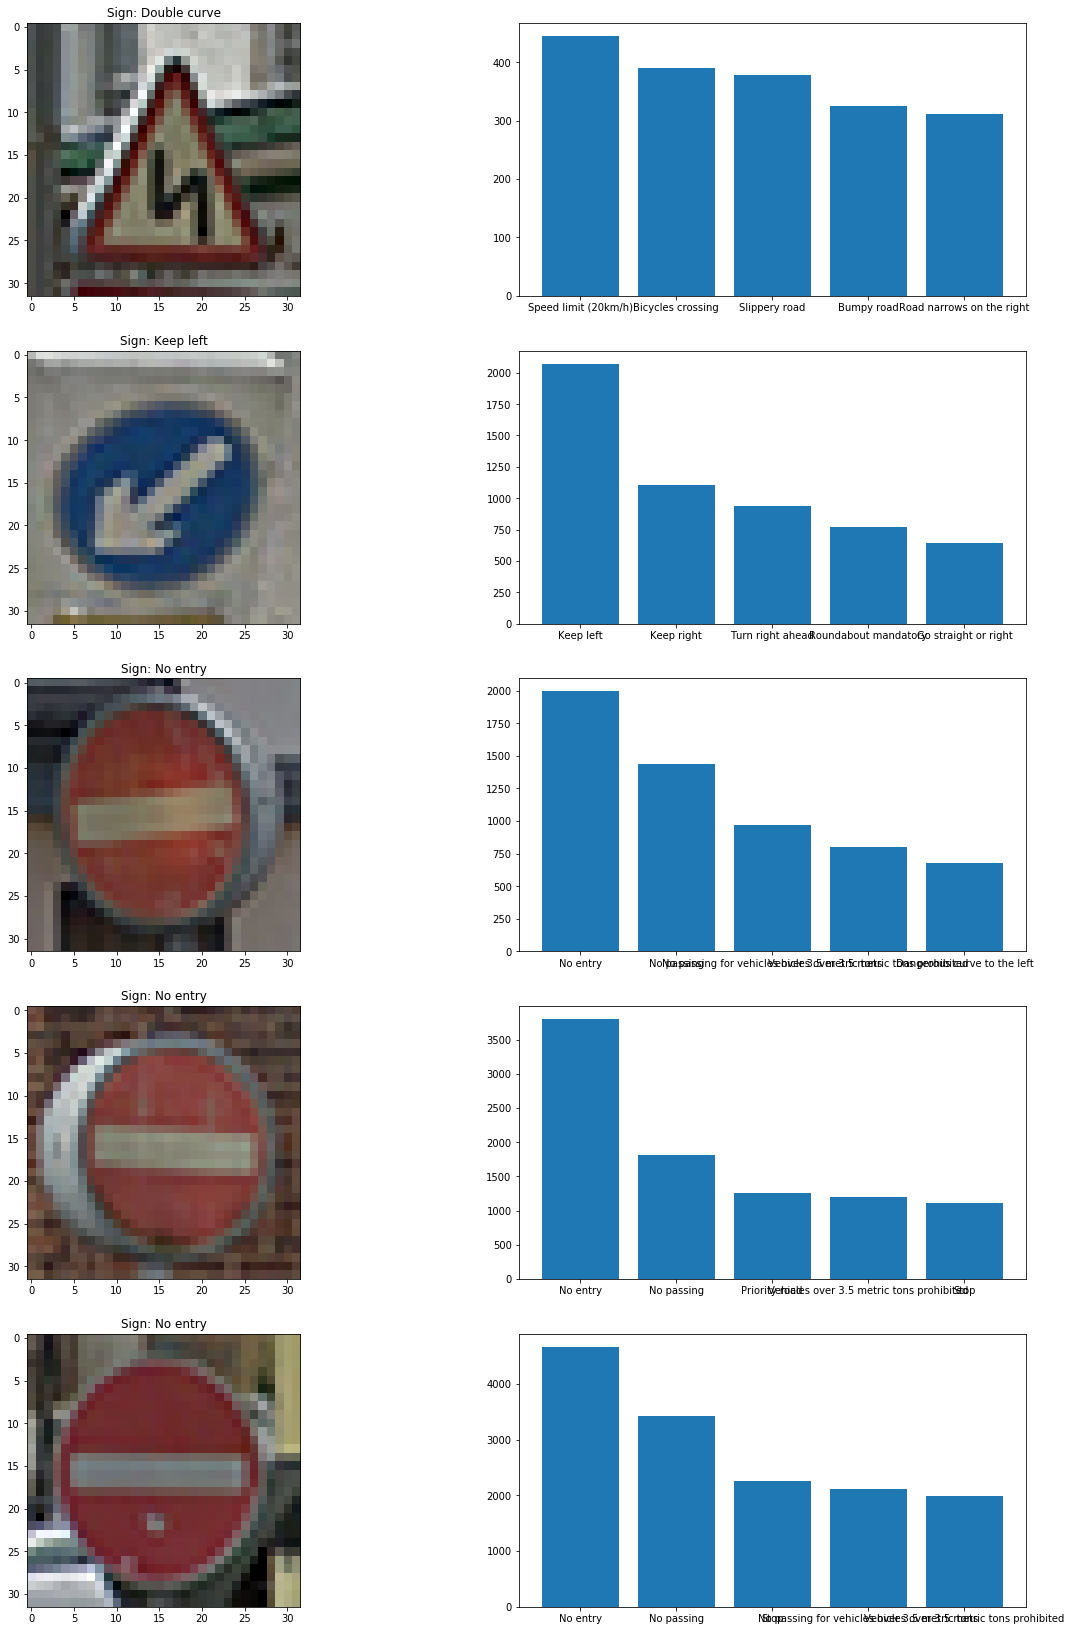

In [31]:
# we will show it using log odds, due to the numbers being very high,
# you can view the relative level of confidence vs other labels.

from pylab import rcParams
rcParams['figure.figsize'] = 20, 25

f, axarr = plt.subplots(5, 2)
f.subplots_adjust(bottom=0.00)

top_k = 5

for x in range(5):
    p_logits_info = p_logits[x]
    img_data = X_custom[x]
    indices, log_odds, labels = get_top_k(p_logits_info, top_k)
    
    axarr[x, 0].imshow(img_data)
    axarr[x, 0].set_title("Sign: {}".format(csvlabels[y_custom[x]]))
    
    plt.sca(axarr[x, 1])
    plt.bar(np.arange(top_k), log_odds)
    plt.xticks(np.arange(top_k), labels)

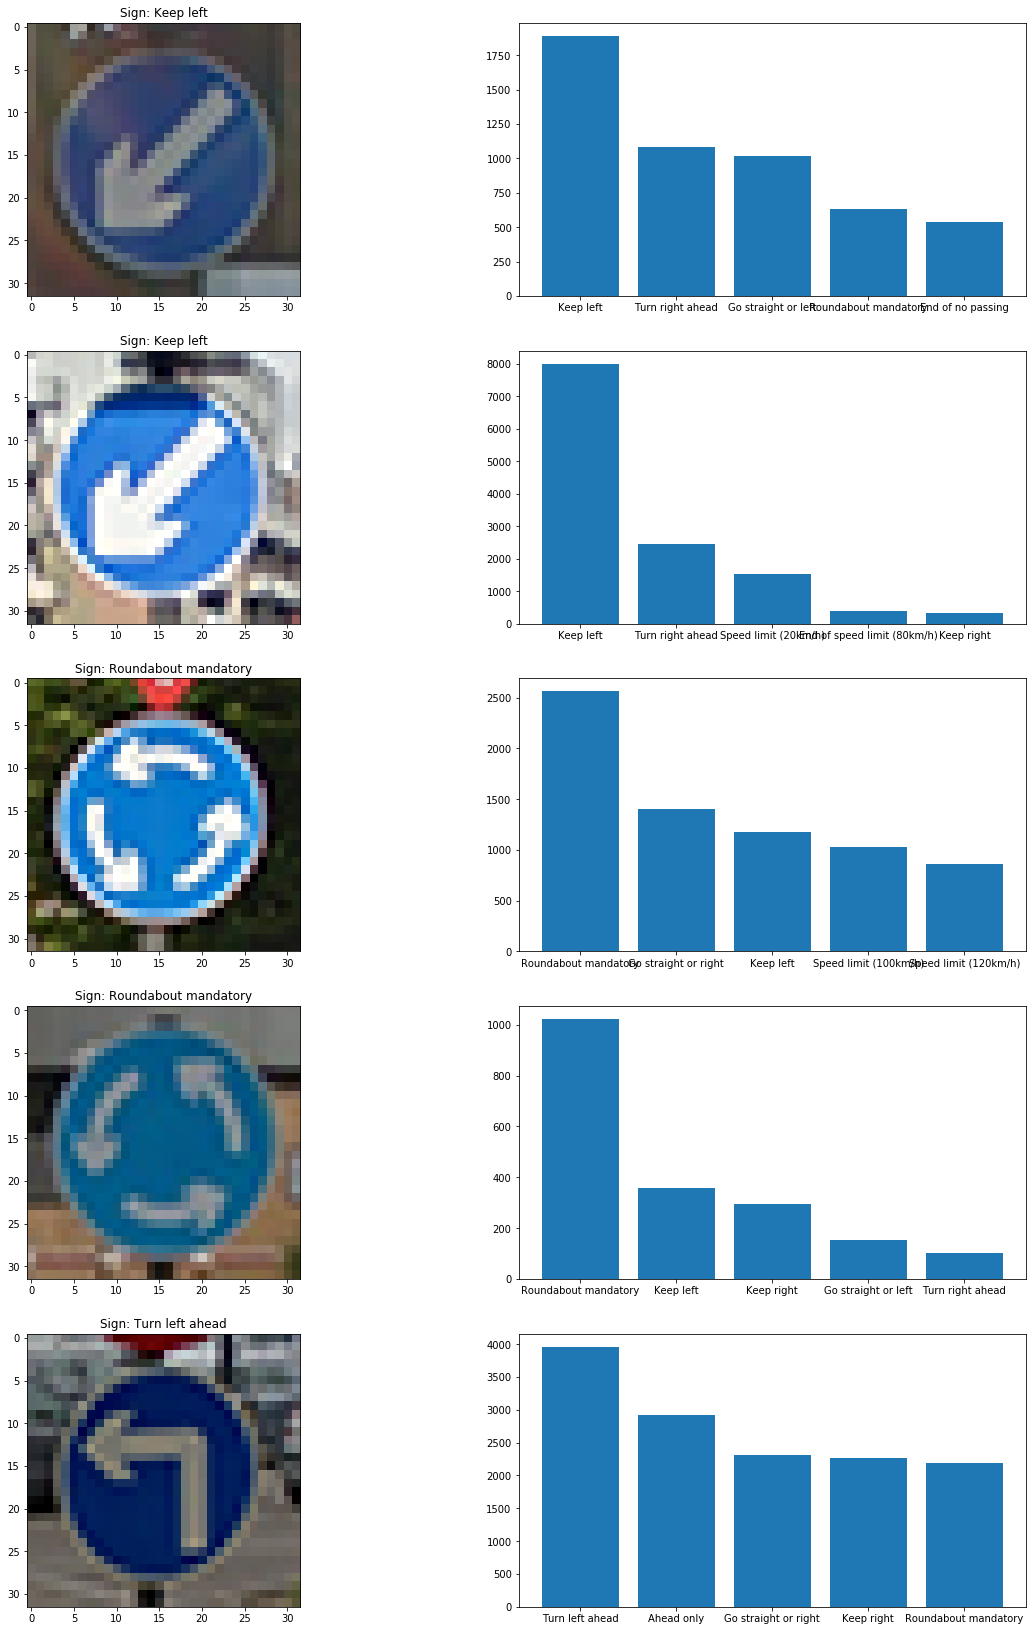

In [32]:
from pylab import rcParams
rcParams['figure.figsize'] = 20, 25

f, axarr = plt.subplots(5, 2)
f.subplots_adjust(bottom=0.00)

top_k = 5

for x in range(5, 10):
    p_logits_info = p_logits[x]
    img_data = X_custom[x]
    indices, log_odds, labels = get_top_k(p_logits_info, top_k)
    
    axarr[x-5, 0].imshow(img_data)
    axarr[x-5, 0].set_title("Sign: {}".format(csvlabels[y_custom[x]]))
    
    plt.sca(axarr[x-5, 1])
    plt.bar(np.arange(top_k), log_odds)
    plt.xticks(np.arange(top_k), labels)